In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# weighted CESM vs CESM

Want to illustrate:
- weighted CESM is unbiased estimator
- weighted CESM is probability distribution function
- concentration as $n\to\infty$

In [3]:
nodes = np.array([1,2,3,4])
weights = np.array([.1,.4,.2,.3])

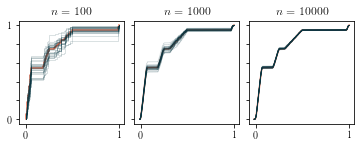

In [4]:
np.random.seed(0) # for reproducibility

fig,axs = plt.subplots(1,3,figsize=(6,1.9),sharey=True,sharex=True)
fig.subplots_adjust(wspace=.1)

axs = axs.flatten()
for j,n in enumerate([100,1000,10000]):

    # synthetic example
    lam = np.hstack([
        np.linspace(0,1,n-n//5-n//5-n//20),
        np.linspace(3,4,n//5),
        np.linspace(5,8,n//5),
        np.linspace(15.8,16,n//20),
    ])

    lam += np.random.randn(n)/10
    lam = np.sort(lam)
    lam /= np.max(lam)

    n_samples = 30

    CESM = Distribution()
    CESM.from_weights(lam,np.ones(n)/n)
    
    step = n//1000 if n > 1000 else 1 #downsample largest CESMs for plotting
    axs[j].step(CESM.get_distr()[0][::step],CESM.get_distr()[1][::step],where='post',color='#E76F51',label='CESM')
    axs[j].set_title(f'$n={n}$')
    
    for i in range(n_samples):

        v = np.random.randn(n)
        v /= np.linalg.norm(v)
        
        wCESM = Distribution()
        wCESM.from_weights(lam,v**2)
        
        axs[j].step(*wCESM.get_distr(),where='post',lw=.75,color='#073642',alpha=.2)
    
legend_elements = [Line2D([0],[0],linestyle='-',color='#073642',\
                          label=r'$\Phi(\vec{A}_{n})$'),
                   Line2D([0],[0],linestyle='-',lw=1,color='#073642',alpha=.2,\
                          label=r'$\Psi(\vec{A}_n,\vec{v}_i)$'),
             ]

axs[0].set_xticks([0,1])
axs[0].set_yticks([0,.2,.4,.6,.8,1])
axs[0].set_yticklabels([0,'','','','',1])

plt.savefig(f'imgs/WCESMs.pdf',bbox_inches='tight')